### London Python for Trading

##### Welcome to the first interactive notebook!

-------------------------------------------------

First let's install all of the necessary packages:

In [23]:
import quandl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


*What are these?*

**quandl** is the package we will use to pull stock price data  
**numpy** is a scientific package, most useful for its array operations  
**pandas** is a data analysis package  
**matplotlib** is a chart and plotting package. In particular matplotlib.pyplot is the main plotting tool that we will be using, so we import it as "plt" for ease of use  

"**% pylab inline**" is a Jupyter Notebook magic commands. We must include this in order to use Jupyter Notebook features such as inline plotting

*Now let's get some data  *

We are going to pull in daily price data using the quandl API. The stock we will choose is Apple  

The data is provided in the form of OHLCV bars - giving the daily open, high, low and close price of the stock, as well as the day's trading volume  

quandl also provides additional data, for example accounting for stock splits. The importance of these adjustments will become clear when we come to plotting the data  

quandl provides a handy function to get data. We just need to provide with 3 parameters: the stock symbol, a start date and an end date  

We can look up the symbol using the [quandl data browser](https://www.quandl.com/search?query=) and we save our data in a pandas dataframe that we will call "aapl"

In [3]:
ticker = "WIKI/AAPL"
start_date = '2012-01-01'
end_date = '2017-11-30'

aapl = quandl.get(ticker, start_date=start_date, end_date=end_date)

We can view our data by using the pandas "head" and "tail" methods, which display the top and bottom 5 rows of the dataframe by default, or the top and bottom n rows as specified by the user:

In [4]:
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-01-03,409.4000,412.50,409.00,411.23,10793600.0,0.0,1.0,52.613606,53.011999,52.562200,52.848787,75555200.0
2012-01-04,410.0000,414.68,409.28,413.44,9286500.0,0.0,1.0,52.690714,53.292160,52.598184,53.132802,65005500.0
2012-01-05,414.9500,418.55,412.67,418.03,9688200.0,0.0,1.0,53.326858,53.789509,53.033847,53.722681,67817400.0
2012-01-06,419.7700,422.75,419.22,422.40,11367600.0,0.0,1.0,53.946296,54.329267,53.875613,54.284287,79573200.0
2012-01-09,425.5001,427.75,421.35,421.73,14072300.0,0.0,1.0,54.682693,54.971837,54.149348,54.198183,98506100.0


In [5]:
aapl.tail(10)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-11-16,171.18,171.87,170.3000,171.10,23497326.0,0.0,1.0,171.18,171.87,170.3000,171.10,23497326.0
2017-11-17,171.04,171.39,169.6400,170.15,21665811.0,0.0,1.0,171.04,171.39,169.6400,170.15,21665811.0
2017-11-20,170.29,170.56,169.5600,169.98,15974387.0,0.0,1.0,170.29,170.56,169.5600,169.98,15974387.0
2017-11-21,170.78,173.70,170.7800,173.14,24875471.0,0.0,1.0,170.78,173.70,170.7800,173.14,24875471.0
2017-11-22,173.36,175.00,173.0500,174.96,24997274.0,0.0,1.0,173.36,175.00,173.0500,174.96,24997274.0
2017-11-24,175.10,175.50,174.6459,174.97,14026519.0,0.0,1.0,175.10,175.50,174.6459,174.97,14026519.0
2017-11-27,175.05,175.08,173.3400,174.09,20536313.0,0.0,1.0,175.05,175.08,173.3400,174.09,20536313.0
2017-11-28,174.30,174.87,171.8600,173.07,25468442.0,0.0,1.0,174.30,174.87,171.8600,173.07,25468442.0
2017-11-29,172.63,172.92,167.1600,169.48,40788324.0,0.0,1.0,172.63,172.92,167.1600,169.48,40788324.0


We might also be interested in some other general properties of our dataset, for example finding the number of rows using the "len" function

In [6]:
len(aapl)

1487

The describe method gives summary statistics for the entire dataframe or for specific columns of the dataframe
For example we might be interested in the summary statistics for the daily closing prices:

In [7]:
aapl['Close'].describe()

count    1487.000000
mean      287.950825
std       207.171888
min        90.280000
25%       112.120000
50%       145.630000
75%       513.019750
max       702.100000
Name: Close, dtype: float64

...here we can see that during the time period we specified, Apple's closing stock price ranged between \$90.28 and \$702.10 per share

To get an even clearer picture of our data and to spot any anomalies or interesting behaviour we want to plot it  

Again it makes sense to do this for individual columns of the dataframe (i.e. individual time series)  

Here we are going to plot the Close price and the Adjusted Close price:

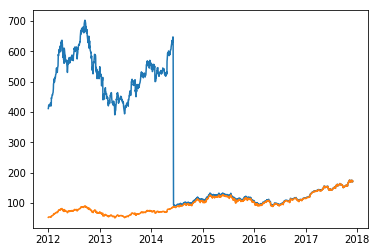

In [10]:
plt.plot(aapl['Close'])
plt.plot(aapl['Adj. Close'])

...this plot is small so let's adjust the size of the figure:

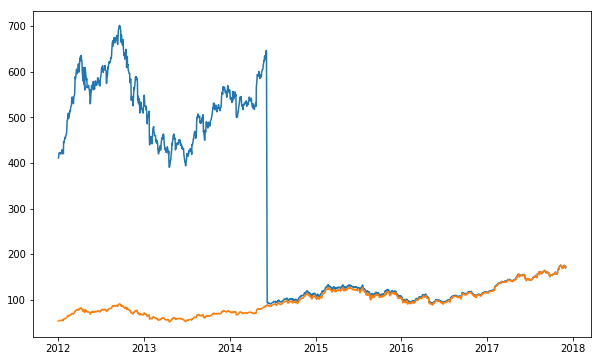

In [18]:
width = 10
height = 6
plt.figure(figsize=(width, height))

plt.plot(aapl['Close'])
plt.plot(aapl['Adj. Close'])

Looking at the two plots we see that the 'Close' series is clearly missing something that the 'Adj. Close' series is capturing 

The big jump that occurs around June 2014 is due to a *stock split*  

While 'Close' gives the actual price listed for Apple in $ on each given trading day, the Adj. Close gives a better representation of an investor's performance had they held the stock over the entire period (a stock split does not impact an investor's overall PnL since the investor will receive more shares at the same time that those shares reduce in value)  

...this demonstrates nicely the distinction between *price* and *adjusted price*

Going forward, for ease of data handling we will use the adjusted price series

Let's now construct a new dataframe to contain just the information we are interested in  
To remind us of what the data actually looks like, we again call the head method:

In [15]:
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-01-03,409.4000,412.50,409.00,411.23,10793600.0,0.0,1.0,52.613606,53.011999,52.562200,52.848787,75555200.0
2012-01-04,410.0000,414.68,409.28,413.44,9286500.0,0.0,1.0,52.690714,53.292160,52.598184,53.132802,65005500.0
2012-01-05,414.9500,418.55,412.67,418.03,9688200.0,0.0,1.0,53.326858,53.789509,53.033847,53.722681,67817400.0
2012-01-06,419.7700,422.75,419.22,422.40,11367600.0,0.0,1.0,53.946296,54.329267,53.875613,54.284287,79573200.0
2012-01-09,425.5001,427.75,421.35,421.73,14072300.0,0.0,1.0,54.682693,54.971837,54.149348,54.198183,98506100.0


We are now going to filter for just the columns beginning with "Adj. ...", using pandas column slicing method, and explicitly stating which columns we want to keep  

We will give our dataframe a new name: "aapl_adj"

In [16]:
aapl_adj = aapl[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
aapl_adj.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2012-01-03,52.613606,53.011999,52.562200,52.848787,75555200.0
2012-01-04,52.690714,53.292160,52.598184,53.132802,65005500.0
2012-01-05,53.326858,53.789509,53.033847,53.722681,67817400.0
2012-01-06,53.946296,54.329267,53.875613,54.284287,79573200.0
2012-01-09,54.682693,54.971837,54.149348,54.198183,98506100.0


Let's sense check our data once more with a plot, this time we will plot the high and low on the same chart

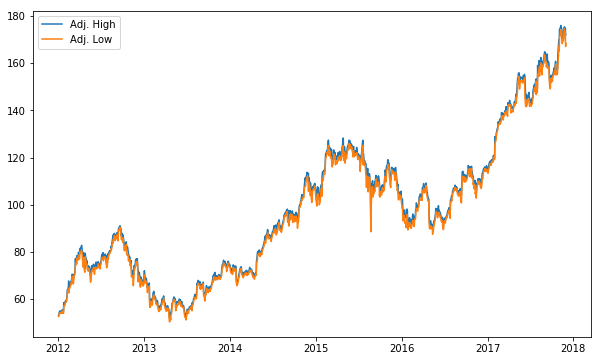

In [19]:
width = 10
height = 6
plt.figure(figsize=(width, height))

plt.plot(aapl_adj['Adj. High'])
plt.plot(aapl_adj['Adj. Low'])
plt.legend(loc='best')

Here we can see that the High always appear to be above the Low, which we expect  
One thing we might want to investigate is the sharp downward spike in the Low price sometime around mid-2015
This could be due to a particularly volatile trading day, or perhaps it is an error in the data

To see this more clearly we can plot for just the year 2015  
Let's define a new dataframe called "sample" to make this easier:

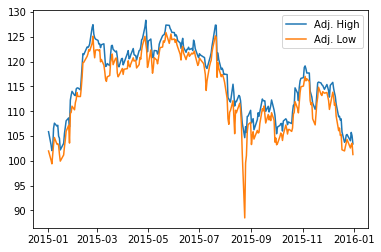

In [25]:
sample = aapl_adj['2015']

width = 10
height = 6
plt.figure(figsize=(width, height))

plt.plot(sample['Adj. High'])
plt.plot(sample['Adj. Low'])
plt.legend(loc='best')

...the anomaly appears to have happened sometime in August 2015  
Drilling down further and just looking at the month of August:

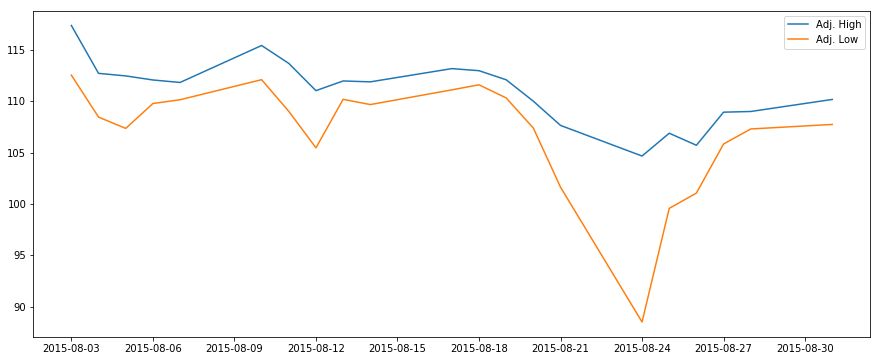

In [27]:
sample = aapl_adj['2015-08']

width = 15
height = 6
plt.figure(figsize=(width, height))

plt.plot(sample['Adj. High'])
plt.plot(sample['Adj. Low'])
plt.legend(loc='best')

...we can now see that the event took place on 24th August 2015  

Let's create a separate time series for the daily trading range of the stock (caluclated as high - low)  
Then we call the "nlargest" method to see the n largest values in that series along with their index:

In [28]:
trading_range = aapl_adj['Adj. High'] - aapl_adj['Adj. Low']
trading_range.nlargest(10)

Date
2015-08-24    16.161796
2017-06-09     9.132944
2014-12-01     7.581033
2015-08-25     7.320909
2017-07-27     6.662965
2014-09-09     6.564645
2015-08-21     6.017383
2017-11-29     5.760000
2015-08-12     5.570048
2015-09-29     5.435366
dtype: float64

...here we have further confirmation that 2015-08-24 did indeed have the greatest trading range, and by some margin

###### Let's now look at some more data analysis methods  

The "diff" method in pandas allows us to quickly calculate the single period returns (here daly returns)  
For example we can compute the daily returns from the daily adjusted Closing prices:

In [30]:
ret = aapl_adj['Adj. Close'].diff()
ret.head()

Date
2012-01-03         NaN
2012-01-04    0.284016
2012-01-05    0.589879
2012-01-06    0.561606
2012-01-09   -0.086104
Name: Adj. Close, dtype: float64

Similarly if we are interested in the perecntage returns we can use "pct_change":

In [31]:
pct_ret = aapl_adj['Adj. Close'].pct_change()
pct_ret.head()

Date
2012-01-03         NaN
2012-01-04    0.005374
2012-01-05    0.011102
2012-01-06    0.010454
2012-01-09   -0.001586
Name: Adj. Close, dtype: float64

Note that the first entry will be "NaN" because both "diff" and "pct_change" need two values to be able to calculate  

Finally it is useful to call the "describe" method again, to see the mean and range of *returns* that Apple has exhibited over this period:

In [32]:
ret.describe()

count    1486.000000
mean        0.080082
std         1.470725
min        -8.235044
25%        -0.615917
50%         0.059879
75%         0.863231
max         7.308599
Name: Adj. Close, dtype: float64

In [33]:
pct_ret.describe()

count    1486.000000
mean        0.000918
std         0.015757
min        -0.123549
25%        -0.006661
50%         0.000521
75%         0.009293
max         0.088741
Name: Adj. Close, dtype: float64

The mean daily return was +\$0.08 and the mean percentage change was +0.09%

We will be using return series like the ones we've just constructed in our future strategy development, for example in regression analysis to identify trends

###### That concludes this introductory notebook  !

**We have covered:** importing packages, pulling data into Python, performing summary analysis of the data, basic plotting and dataframe manipulation  
